In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf

from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Load the processesd dataset

# Construct the relative path
relative_path = os.path.join("data/raw", "retail_sales_dataset.csv")

# Read the processed file to a dataframe
retail_df = pd.read_csv(relative_path)

# Display the first five records 
retail_df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
# Describe the dataset
retail_df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [4]:
# Info about the fields
retail_df.info()

print

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


<function print>

In [ ]:
# print the column names
print(retail_df.columns)

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [ ]:
# Shape 
retail_df.shape

(1000, 9)

In [ ]:
# Create new feature columns
retail_df['Total Spend'] = retail_df['Quantity'] * retail_df['Price per Unit']
retail_df['Avg Spend per Transaction'] = retail_df['Total Amount'] / retail_df['Quantity']

# Price per Item
retail_df['Price per Item'] = retail_df['Total Amount'] / retail_df['Quantity']

# Creating Age Groups
bins = [18, 25, 35, 45, 55, 65, 100]  
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
retail_df['Age Group'] = pd.cut(retail_df['Age'], bins=bins, labels=labels, right=False)
print(retail_df['Age Group'] )

# Extracting Transaction Month
retail_df['Date'] = pd.to_datetime(retail_df['Date'])  # Convert to datetime
retail_df['Transaction Month'] = retail_df['Date'].dt.month

0      25-34
1      25-34
2      45-54
3      35-44
4      25-34
       ...  
995    55-64
996    45-54
997    18-24
998    35-44
999    45-54
Name: Age Group, Length: 1000, dtype: category
Categories (6, object): ['18-24' < '25-34' < '35-44' < '45-54' < '55-64' < '65+']


In [ ]:
# Convert categorical columns to numerical

# Encode 'Gender' (Male=0, Female=1)
label_encoder = LabelEncoder()
retail_df['Gender'] = label_encoder.fit_transform(retail_df['Gender'])

# Encode 'Product Category' (this is our target variable)
retail_df['Product Category'] = label_encoder.fit_transform(retail_df['Product Category'])

print(retail_df['Product Category'])

# Encode 'Age Group' & 'Transaction Month'

retail_df['Age Group'] = label_encoder.fit_transform(retail_df['Age Group'])
retail_df['Transaction Month'] = label_encoder.fit_transform(retail_df['Transaction Month'])
print(retail_df['Transaction Month'])

0      0
1      1
2      2
3      1
4      0
      ..
995    1
996    0
997    0
998    2
999    2
Name: Product Category, Length: 1000, dtype: int32
0      10
1       1
2       0
3       4
4       4
       ..
995     4
996    10
997     9
998    11
999     3
Name: Transaction Month, Length: 1000, dtype: int64


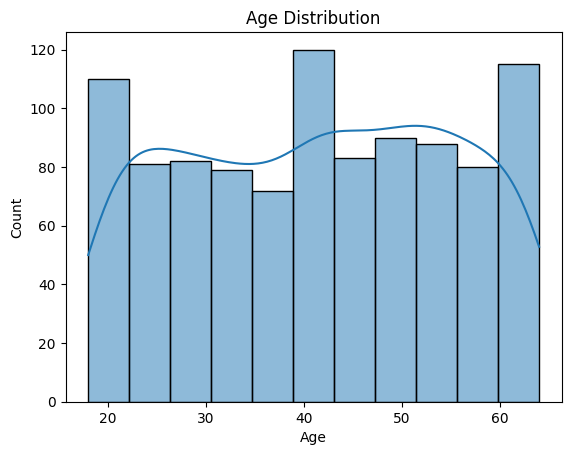

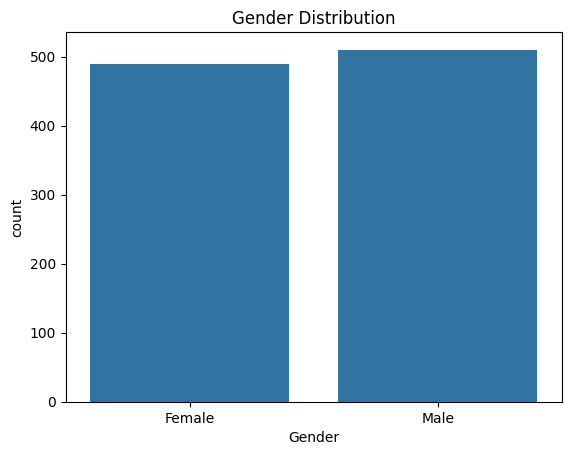

In [ ]:
# Visualize the distribution of 'Age' and 'Gender'
sns.histplot(retail_df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

sns.countplot(x=retail_df['Gender'].replace({1: 'Female', 0: 'Male'}), data=retail_df)
plt.title("Gender Distribution")
plt.show()

In [ ]:
# Features (X) and Target (y)
X = retail_df.drop(columns=['Product Category', 'Customer ID', 'Transaction ID', 'Date', 'Age Group'])
y = retail_df['Product Category']

X

,Gender,Age,Quantity,Price per Unit,Total Amount,Total Spend,Avg Spend per Transaction,Price per Item,Transaction Month
0,1,34,3,50,150,150,50.0,50.0,10
1,0,26,2,500,1000,1000,500.0,500.0,1
2,1,50,1,30,30,30,30.0,30.0,0
3,1,37,1,500,500,500,500.0,500.0,4
4,1,30,2,50,100,100,50.0,50.0,4
...,...,...,...,...,...,...,...,...,...
995,1,62,1,50,50,50,50.0,50.0,4
996,1,52,3,30,90,90,30.0,30.0,10
997,0,23,4,25,100,100,25.0,25.0,9
998,0,36,3,50,150,150,50.0,50.0,11


In [ ]:
# Split the data into test train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.98757716, -0.20731216,  0.44059449, ...,  0.64246705,
         0.64246705,  0.98746139],
       [-0.98757716,  0.9678852 ,  1.32621154, ..., -0.78055266,
        -0.78055266, -1.0366176 ],
       [-0.98757716,  0.60063603,  1.32621154, ..., -0.6751438 ,
        -0.6751438 ,  0.69830725],
       ...,
       [-0.98757716, -0.06041249,  0.44059449, ..., -0.78055266,
        -0.78055266, -1.32577174],
       [-0.98757716,  1.11478487,  1.32621154, ..., -0.78055266,
        -0.78055266, -1.0366176 ],
       [-0.98757716,  1.26168454, -1.33063963, ..., -0.80690488,
        -0.80690488, -1.61492588]])

In [ ]:
# Improved FFNN model
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import layers, initializers
from tensorflow.keras.regularizers import l2

# Compute class weights so that underrepresented classes get higher importance.
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights_dict = dict(enumerate(class_weights))

# Build Neural Network
model = Sequential()

# Input Layer
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu', kernel_initializer=initializers.HeUniform()))
model.add(BatchNormalization())  # Normalize inputs helps the model train faster and better.

# Hidden Layers to increase the complexity 
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())  # Normalize inputs helps the model train faster and better.
model.add(Dropout(0.3))  # Prevent overfitting
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())  # Normalize inputs helps the model train faster and better.
model.add(Dropout(0.2))

# Output Layer (Softmax for multi-class classification)
model.add(Dense(len(np.unique(y_train)), activation='softmax'))



c:\Users\Amit.Sindhwani\AppData\Local\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [ ]:
# Train Model
history = model.fit(X_train, y_train, epochs=300, batch_size=32, class_weight=class_weights_dict, validation_split=0.2)

Epoch 1/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.3497 - loss: 4.0157 - val_accuracy: 0.2937 - val_loss: 3.8595
Epoch 2/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3624 - loss: 3.7722 - val_accuracy: 0.2562 - val_loss: 3.6814
Epoch 3/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3474 - loss: 3.6050 - val_accuracy: 0.2937 - val_loss: 3.5755
Epoch 4/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3924 - loss: 3.4460 - val_accuracy: 0.3313 - val_loss: 3.3911
Epoch 5/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4290 - loss: 3.3090 - val_accuracy: 0.3250 - val_loss: 3.3020
Epoch 6/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4433 - loss: 3.2076 - val_accuracy: 0.3375 - val_loss: 3.1769
Epoch 7/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4161 - loss: 3.1118 - val_accuracy: 0.3500 - val_loss: 3.0760
Epoch 8/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4156 - loss: 2.9976 - val_accuracy: 0.3125 -

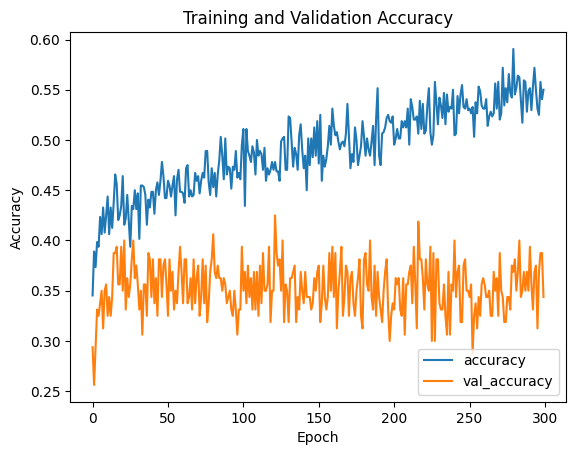

In [120]:
# Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


In [121]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss :.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3940 - loss: 1.3854  
Test Accuracy: 39.50%
Test Loss: 1.39
